In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy import stats
from platform import python_version

In [3]:
print(f"This notebook is running Python {python_version()}")

This notebook is running Python 3.11.6


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("e-shop clothing 2008.csv", delimiter=";") # (clickstream, 2019)

In [6]:
df.isnull().values.any()

False

In [7]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [8]:
df.tail()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1
165473,2008,8,13,3,34,24026,2,B2,3,1,2,57,1,1


In [9]:
pd.DataFrame(df.columns)

,0
0,year
1,month
2,day
3,order
4,country
5,session ID
6,page 1 (main category)
7,page 2 (clothing model)
8,colour
9,location


In [10]:
df = df.rename(columns={
    "session ID": "session_id",
    "page 1 (main category)": "categories", 
    "page 2 (clothing model)": "clothing_model",
    "model photography": "model_photo",
    "price 2": "price_high_low",
})

In [11]:
df.describe()

,year,month,day,order,country,session_id,categories,colour,location,model_photo,price,price_high_low,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [12]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id', 'categories',
       'clothing_model', 'colour', 'location', 'model_photo', 'price',
       'price_high_low', 'page'],
      dtype='object')

In [13]:
df = df[['order', 'session_id', 'clothing_model', 'location', 'page']]

In [14]:
df.head()

,order,session_id,clothing_model,location,page
0,1,1,A13,5,1
1,2,1,A16,6,1
2,3,1,B4,2,1
3,4,1,B17,6,1
4,5,1,B8,3,1


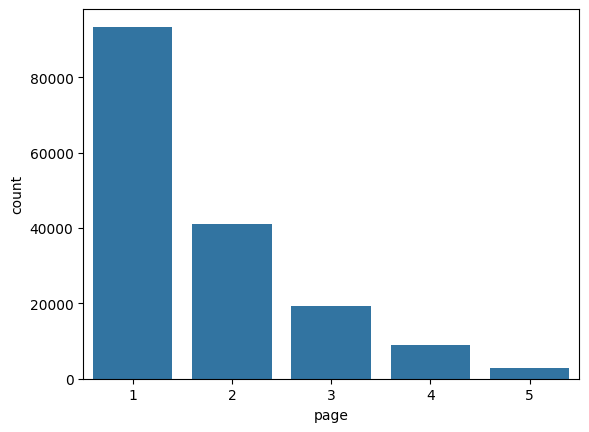

In [15]:
sns.countplot(
    data=df,
    x="page",
)

plt.show()

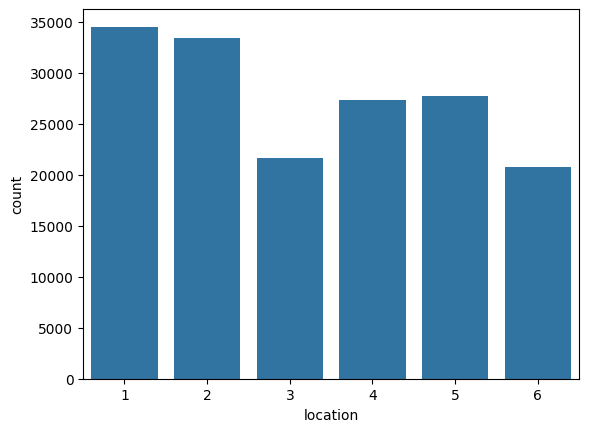

In [16]:
sns.countplot(
    data=df,
    x="location",
)

plt.show()

In [17]:
cats = ['location', 'page']

In [18]:
df = pd.get_dummies(
    data=df,
    columns=cats,
    drop_first=False,
    dtype=bool,
)

In [19]:
df.head()

,order,session_id,clothing_model,location_1,location_2,location_3,location_4,location_5,location_6,page_1,page_2,page_3,page_4,page_5
0,1,1,A13,False,False,False,False,True,False,True,False,False,False,False
1,2,1,A16,False,False,False,False,False,True,True,False,False,False,False
2,3,1,B4,False,True,False,False,False,False,True,False,False,False,False
3,4,1,B17,False,False,False,False,False,True,True,False,False,False,False
4,5,1,B8,False,False,True,False,False,False,True,False,False,False,False


In [20]:
df.to_csv("cleaned_data.csv")

In [21]:
df.isnull().values.any()

False

In [22]:
def is_in_location(loc: bool, page: bool) -> bool:
    if loc and page:
        return True
    else:
        return False

In [23]:
for loc in range(1,7):
    for page in range(1,6):
        col_name = f"loc{loc}_page{page}"
        loc_name = f"location_{loc}"
        page_name = f"page_{page}"
        df[col_name] = df.apply(lambda row: is_in_location(row[loc_name], row[page_name]), axis=1)

In [24]:
df.head()

,order,session_id,clothing_model,location_1,location_2,location_3,location_4,location_5,location_6,page_1,page_2,page_3,page_4,page_5,loc1_page1,loc1_page2,loc1_page3,loc1_page4,loc1_page5,loc2_page1,loc2_page2,loc2_page3,loc2_page4,loc2_page5,loc3_page1,loc3_page2,loc3_page3,loc3_page4,loc3_page5,loc4_page1,loc4_page2,loc4_page3,loc4_page4,loc4_page5,loc5_page1,loc5_page2,loc5_page3,loc5_page4,loc5_page5,loc6_page1,loc6_page2,loc6_page3,loc6_page4,loc6_page5
0,1,1,A13,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,2,1,A16,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,3,1,B4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,1,B17,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,5,1,B8,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df_trans = df["session_id"].value_counts()

In [26]:
df_trans.head()

session_id
22433    195
13846    192
22902    185
8201     161
19623    142
Name: count, dtype: int64

In [27]:
df_trans = pd.DataFrame(df_trans)

In [28]:
df_trans.head()

,count
session_id,
22433,195
13846,192
22902,185
8201,161
19623,142


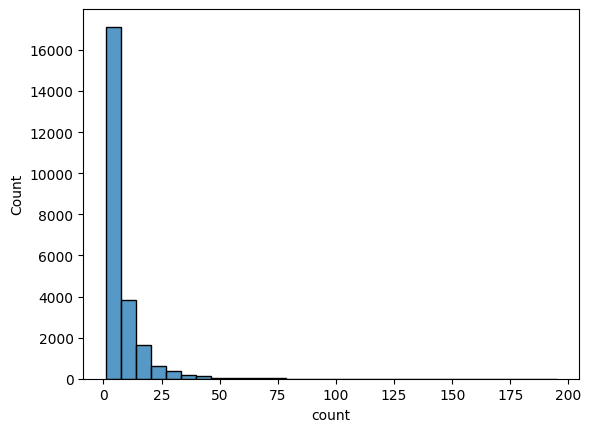

In [29]:
sns.histplot(
    data=df_trans,
    x="count",
    bins=30
)

plt.show()

In [30]:
df_trans.describe()

,count
count,24026.000000
mean,6.887289
std,8.995161
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,195.000000


In [31]:
def is_count_more_than_three(count):
    if count > 3:
        return True
    else: 
        return False

In [32]:
df_trans["large_order"] = df_trans["count"].apply(is_count_more_than_three)

In [33]:
df_trans.head()

,count,large_order
session_id,,
22433,195,True
13846,192,True
22902,185,True
8201,161,True
19623,142,True


In [34]:
df_trans.isnull().values.any()

False

In [35]:
df_trans.to_csv("transaction_counts.csv")

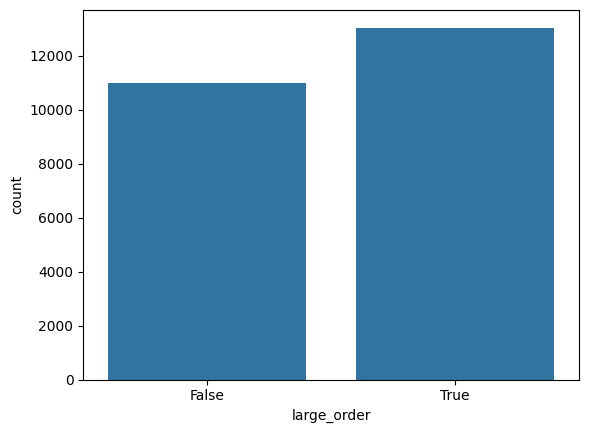

In [36]:
sns.countplot(
    data=df_trans,
    x="large_order"
)

plt.show()

In [37]:
df = pd.merge(
    left=df,
    right=df_trans,
    on="session_id"
)

In [38]:
df.head()

,order,session_id,clothing_model,location_1,location_2,location_3,location_4,location_5,location_6,page_1,page_2,page_3,page_4,page_5,loc1_page1,loc1_page2,loc1_page3,loc1_page4,loc1_page5,loc2_page1,loc2_page2,loc2_page3,loc2_page4,loc2_page5,loc3_page1,loc3_page2,loc3_page3,loc3_page4,loc3_page5,loc4_page1,loc4_page2,loc4_page3,loc4_page4,loc4_page5,loc5_page1,loc5_page2,loc5_page3,loc5_page4,loc5_page5,loc6_page1,loc6_page2,loc6_page3,loc6_page4,loc6_page5,count,large_order
0,1,1,A13,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,9,True
1,2,1,A16,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,9,True
2,3,1,B4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,9,True
3,4,1,B17,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,9,True
4,5,1,B8,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,9,True


In [39]:
df.isnull().values.any()

False

In [40]:
df.to_csv("combined_cleaned_data.csv")

In [41]:
df_firsts = df[df["order"] == 1]
df_firsts.head()

,order,session_id,clothing_model,location_1,location_2,location_3,location_4,location_5,location_6,page_1,page_2,page_3,page_4,page_5,loc1_page1,loc1_page2,loc1_page3,loc1_page4,loc1_page5,loc2_page1,loc2_page2,loc2_page3,loc2_page4,loc2_page5,loc3_page1,loc3_page2,loc3_page3,loc3_page4,loc3_page5,loc4_page1,loc4_page2,loc4_page3,loc4_page4,loc4_page5,loc5_page1,loc5_page2,loc5_page3,loc5_page4,loc5_page5,loc6_page1,loc6_page2,loc6_page3,loc6_page4,loc6_page5,count,large_order
0,1,1,A13,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,9,True
9,1,2,B31,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,10,True
19,1,3,B17,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,6,True
25,1,4,A34,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,4,True
29,1,5,C21,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,False


In [42]:
df_firsts.describe(include=['bool'])

,location_1,location_2,location_3,location_4,location_5,location_6,page_1,page_2,page_3,page_4,page_5,loc1_page1,loc1_page2,loc1_page3,loc1_page4,loc1_page5,loc2_page1,loc2_page2,loc2_page3,loc2_page4,loc2_page5,loc3_page1,loc3_page2,loc3_page3,loc3_page4,loc3_page5,loc4_page1,loc4_page2,loc4_page3,loc4_page4,loc4_page5,loc5_page1,loc5_page2,loc5_page3,loc5_page4,loc5_page5,loc6_page1,loc6_page2,loc6_page3,loc6_page4,loc6_page5,large_order
count,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2
top,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
freq,17867,19110,21577,20205,20063,21308,18630,20286,22904,23610,23908,19063,23257,23811,23842,23998,20226,23348,23711,23947,23982,22351,23450,23930,23941,24009,20943,23505,23855,24009,23997,21103,23228,23799,24011,24026,21840,23628,23928,23990,24026,13044


In [43]:
df_temp = df_firsts[df_firsts["large_order"] == True]
print(len(df_temp))
print(len(df_firsts))

13044
24026


In [44]:
large_order_true_expected_rate = len(df_temp) / len(df_firsts)
print(large_order_true_expected_rate)

0.5429118455007076


In [45]:
df_firsts.columns

Index(['order', 'session_id', 'clothing_model', 'location_1', 'location_2',
       'location_3', 'location_4', 'location_5', 'location_6', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5', 'loc1_page1', 'loc1_page2',
       'loc1_page3', 'loc1_page4', 'loc1_page5', 'loc2_page1', 'loc2_page2',
       'loc2_page3', 'loc2_page4', 'loc2_page5', 'loc3_page1', 'loc3_page2',
       'loc3_page3', 'loc3_page4', 'loc3_page5', 'loc4_page1', 'loc4_page2',
       'loc4_page3', 'loc4_page4', 'loc4_page5', 'loc5_page1', 'loc5_page2',
       'loc5_page3', 'loc5_page4', 'loc5_page5', 'loc6_page1', 'loc6_page2',
       'loc6_page3', 'loc6_page4', 'loc6_page5', 'count', 'large_order'],
      dtype='object')

In [46]:
loc_page_combos = [
    'location_1', 'location_2',
       'location_3', 'location_4', 'location_5', 'location_6', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5', 'loc1_page1', 'loc1_page2',
       'loc1_page3', 'loc1_page4', 'loc1_page5', 'loc2_page1', 'loc2_page2',
       'loc2_page3', 'loc2_page4', 'loc2_page5', 'loc3_page1', 'loc3_page2',
       'loc3_page3', 'loc3_page4', 'loc3_page5', 'loc4_page1', 'loc4_page2',
       'loc4_page3', 'loc4_page4', 'loc4_page5', 'loc5_page1', 'loc5_page2',
       'loc5_page3', 'loc5_page4', 'loc5_page5', 'loc6_page1', 'loc6_page2',
       'loc6_page3', 'loc6_page4', 'loc6_page5'
]

In [47]:
chi_square_vals = []

In [48]:
for combo in loc_page_combos:
    df_temp = df_firsts[df_firsts[combo] == True]
    count_in_combo = len(df_temp)

    combo_large_expected = count_in_combo * large_order_true_expected_rate
    combo_small_expected = count_in_combo - combo_large_expected
    combo_exp = np.array([combo_large_expected, combo_small_expected])

    df_temp_large = df_temp[df_temp["large_order"] == True]

    combo_large_actual = len(df_temp_large)
    combo_small_actual = count_in_combo - combo_large_actual
    combo_act = np.array([combo_large_actual, combo_small_actual])

    chi = stats.chisquare(f_obs=combo_act, f_exp=combo_exp)
    chi_square_vals.append([combo, chi[0], chi[1], combo_large_actual, combo_small_actual])

/home/carl/projects/j34_clothing_location/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8064: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [49]:
df_chi = pd.DataFrame(chi_square_vals, columns=["variable", "statistic", "p_value", "large", "small"])

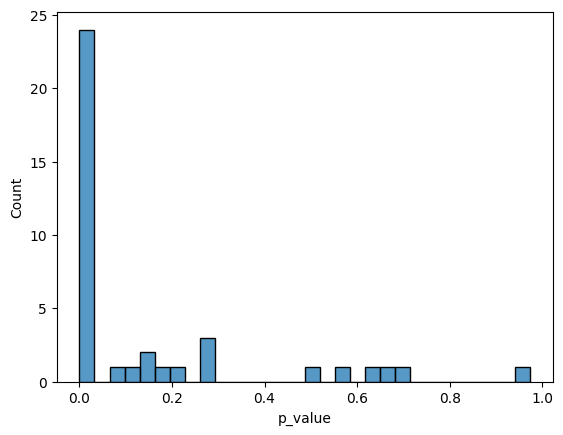

In [50]:
sns.histplot(
    data=df_chi,
    x="p_value",
    bins=30
)

plt.show()

In [51]:
min_idx = df_chi["p_value"].idxmin()

In [52]:
print(f"Chi-Square test lowest P-value: {df_chi.iloc[min_idx, 2]}")
print(df_chi.iloc[min_idx, 0])

Chi-Square test lowest P-value: 1.0930242550433732e-38
loc1_page1


In [53]:
def reject_null(p_value):
    if p_value < 0.05:
        return True
    else:
        return False

In [54]:
df_chi["reject_null"] = df_chi["p_value"].apply(reject_null) 

In [55]:
print(df_chi[["variable", "p_value", "reject_null"]])

      variable       p_value  reject_null
0   location_1  1.722096e-21         True
1   location_2  4.818991e-05         True
2   location_3  6.354312e-05         True
3   location_4  5.048789e-01        False
4   location_5  4.226941e-04         True
5   location_6  1.089107e-01        False
6       page_1  7.121312e-09         True
7       page_2  1.345220e-13         True
8       page_3  2.720389e-11         True
9       page_4  5.804097e-05         True
10      page_5  2.992563e-03         True
11  loc1_page1  1.093024e-38         True
12  loc1_page2  5.321215e-03         True
13  loc1_page3  1.830131e-01        False
14  loc1_page4  1.126307e-06         True
15  loc1_page5  2.245391e-01        False
16  loc2_page1  1.335934e-01        False
17  loc2_page2  1.537889e-04         True
18  loc2_page3  2.828933e-05         True
19  loc2_page4  7.475386e-02        False
20  loc2_page5  5.677297e-01        False
21  loc3_page1  4.192062e-03         True
22  loc3_page2  1.019194e-02      

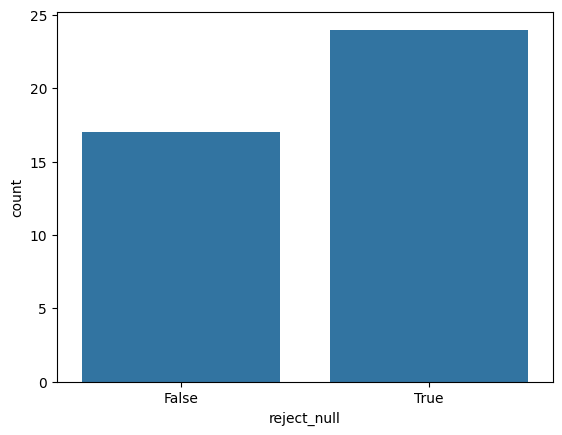

In [56]:
sns.countplot(
    data=df_chi,
    x="reject_null"
)
plt.show()

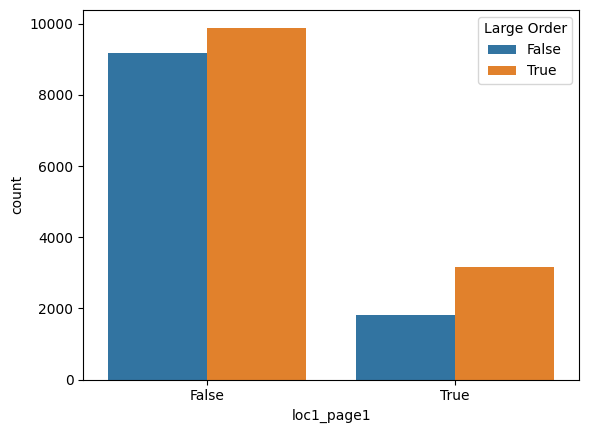

In [57]:
sns.countplot(
        data=df_firsts,
        x=df_chi.iloc[min_idx, 0],
        hue="large_order"
    )

plt.legend(loc="upper right", title="Large Order")
plt.show()

In [58]:
df_prime = df[df[df_chi.iloc[min_idx, 0]] == True]

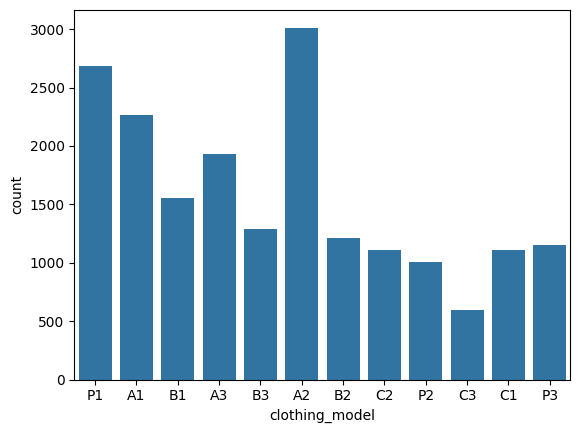

In [59]:
sns.countplot(
    data=df_prime,
    x="clothing_model"
)
plt.show()

In [60]:
prime_models = df_prime["clothing_model"]
prime_models = set(prime_models)
prime_models

{'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'P1', 'P2', 'P3'}

In [61]:
def is_prime_model(model):
    if model in prime_models:
        return model
    else:
        return "other"

In [62]:
df_firsts["is_prime_model"] = df_firsts["clothing_model"].apply(is_prime_model)

/tmp/ipykernel_2326/1628497796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firsts["is_prime_model"] = df_firsts["clothing_model"].apply(is_prime_model)


In [63]:
df_firsts = pd.get_dummies(
    data=df_firsts,
    columns=["is_prime_model"],
    drop_first=False,
    dtype=bool,
)

In [64]:
df_firsts.head()

,order,session_id,clothing_model,location_1,location_2,location_3,location_4,location_5,location_6,page_1,page_2,page_3,page_4,page_5,loc1_page1,loc1_page2,loc1_page3,loc1_page4,loc1_page5,loc2_page1,loc2_page2,loc2_page3,loc2_page4,loc2_page5,loc3_page1,loc3_page2,loc3_page3,loc3_page4,loc3_page5,loc4_page1,loc4_page2,loc4_page3,loc4_page4,loc4_page5,loc5_page1,loc5_page2,loc5_page3,loc5_page4,loc5_page5,loc6_page1,loc6_page2,loc6_page3,loc6_page4,loc6_page5,count,large_order,is_prime_model_A1,is_prime_model_A2,is_prime_model_A3,is_prime_model_B1,is_prime_model_B2,is_prime_model_B3,is_prime_model_C1,is_prime_model_C2,is_prime_model_C3,is_prime_model_P1,is_prime_model_P2,is_prime_model_P3,is_prime_model_other
0,1,1,A13,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,9,True,False,False,False,False,False,False,False,False,False,False,False,False,True
9,1,2,B31,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,10,True,False,False,False,False,False,False,False,False,False,False,False,False,True
19,1,3,B17,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,6,True,False,False,False,False,False,False,False,False,False,False,False,False,True
25,1,4,A34,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,4,True,False,False,False,False,False,False,False,False,False,False,False,False,True
29,1,5,C21,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [65]:
df_firsts.columns

Index(['order', 'session_id', 'clothing_model', 'location_1', 'location_2',
       'location_3', 'location_4', 'location_5', 'location_6', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5', 'loc1_page1', 'loc1_page2',
       'loc1_page3', 'loc1_page4', 'loc1_page5', 'loc2_page1', 'loc2_page2',
       'loc2_page3', 'loc2_page4', 'loc2_page5', 'loc3_page1', 'loc3_page2',
       'loc3_page3', 'loc3_page4', 'loc3_page5', 'loc4_page1', 'loc4_page2',
       'loc4_page3', 'loc4_page4', 'loc4_page5', 'loc5_page1', 'loc5_page2',
       'loc5_page3', 'loc5_page4', 'loc5_page5', 'loc6_page1', 'loc6_page2',
       'loc6_page3', 'loc6_page4', 'loc6_page5', 'count', 'large_order',
       'is_prime_model_A1', 'is_prime_model_A2', 'is_prime_model_A3',
       'is_prime_model_B1', 'is_prime_model_B2', 'is_prime_model_B3',
       'is_prime_model_C1', 'is_prime_model_C2', 'is_prime_model_C3',
       'is_prime_model_P1', 'is_prime_model_P2', 'is_prime_model_P3',
       'is_prime_model_other'],
      

In [66]:
prime_models = [
    'is_prime_model_A1', 'is_prime_model_A2', 'is_prime_model_A3',
       'is_prime_model_B1', 'is_prime_model_B2', 'is_prime_model_B3',
       'is_prime_model_C1', 'is_prime_model_C2', 'is_prime_model_C3',
       'is_prime_model_P1', 'is_prime_model_P2', 'is_prime_model_P3',
]